# **Forest Fire Prediction**

description:

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.model_selection import train_test_split

## 1. Pre-processing

## 1.1 Dataset

In [27]:
url = 'https://raw.githubusercontent.com/louis-not/ForestFirePrediction/main/dataset/df_preprocessed.csv'
df = pd.read_csv(url)
df.shape

(510, 29)

In [28]:
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,...,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,4.414010,56.7,665.6,1.064711,27.8,32,2.7,0,...,0,0,0,0,0,0,0,0,0,0
506,2,4,4.414010,56.7,665.6,1.064711,21.9,71,5.8,0,...,0,0,0,0,0,0,0,0,0,0
507,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,0,...,0,0,0,0,0,0,0,0,0,0
508,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.tail(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
507,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,0,...,0,0,0,0,0,0,0,0,0,0
508,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0,...,0,0,0,0,0,0,0,0,0,0
509,6,3,4.388257,3.0,106.7,0.741937,11.8,31,4.5,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df.drop('damage_category',axis=1,inplace=True)
df.drop(['FFMC','DC','ISI','temp','month_sep','month_aug'],axis=1,inplace=True)
features = df.drop(columns='label')
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=20)

In [32]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

## Backward Propagation Tuning

In [53]:
# def create_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, input_dim=21, kernel_initializer='uniform', activation='softmax', kernel_constraint=maxnorm(4)))
#     model.add(Dense(1, activation='sigmoid'))
 
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.2), metrics=['accuracy'])
#     return model

# # create model
# model = KerasClassifier(build_fn=create_model, verbose=1)

In [62]:
def fit_model(trainX, trainy, validX, validy, lrate, loss_f):
    
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=21, kernel_initializer='uniform', activation='softmax', kernel_constraint=maxnorm(4)))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = SGD(learning_rate=lrate, momentum=0.2)
    model.compile(loss=loss_f, optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=400, batch_size = 510, verbose=0)
    
    # plot learning curves|
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

In [98]:
# create learning curves for different learning rates
learning_rates = [1/(10**i) for i in range(8)] 

In [105]:
learning_rates

[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

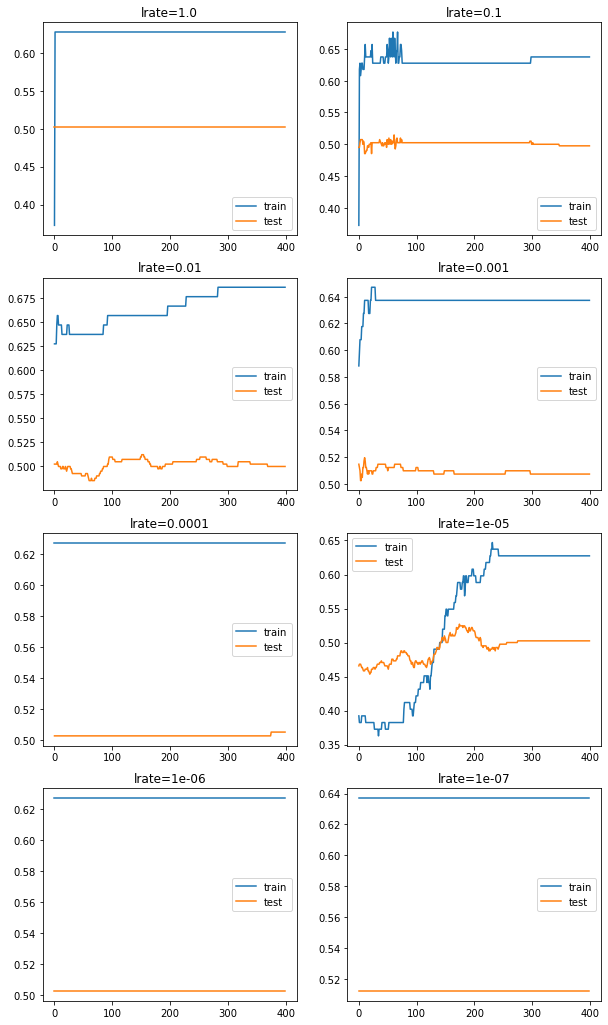

In [103]:
plt.figure(figsize=(10, 18))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i], 'binary_crossentropy')

# show learning curves
plt.show()

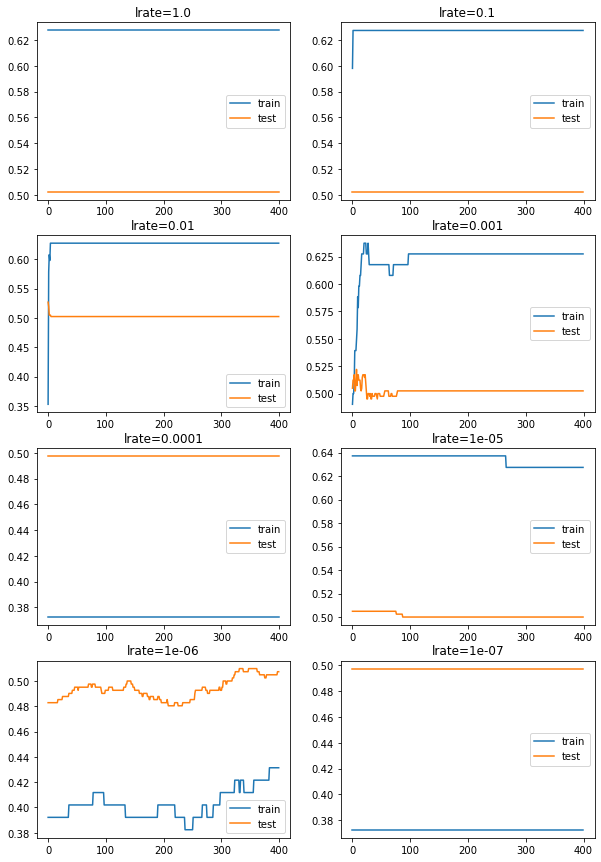

In [104]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i], 'Hinge')

# show learning curves
plt.show()

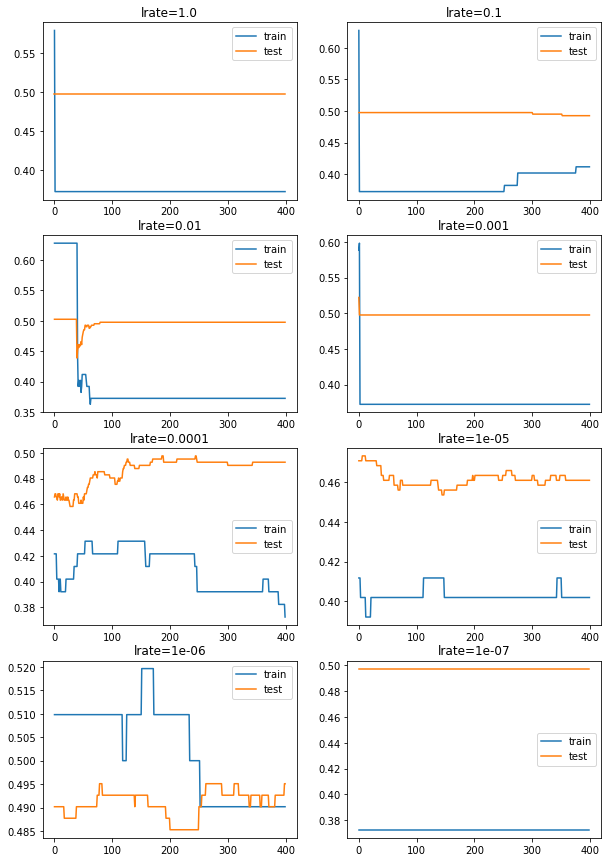

In [102]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i], 'SquaredHinge')

# show learning curves
plt.show()

In [142]:
def fit_model_optimizer(trainX, trainy, validX, validy, opt):
    
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=21, kernel_initializer='uniform', activation='softmax', kernel_constraint=maxnorm(4)))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    if opt == 1:
        optimizer = SGD(learning_rate=0.1, momentum=0.2)
    elif opt == 2:
        optimizer = Adam(lr=0.1)
    elif opt == 3: 
        optimizer = RMSprop(learning_rate=0.1, momentum=0.2)
    elif opt == 4:
        optimizer = Adadelta(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=400, batch_size = 510, verbose=0)
    
    # plot learning curves|
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()

    # evaluate
    _, train_acc = model.evaluate(X_train,y_train, verbose=0)
    _, valid_acc = model.evaluate(X_test,y_test, verbose=0)
    print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.627, Valid: 0.502


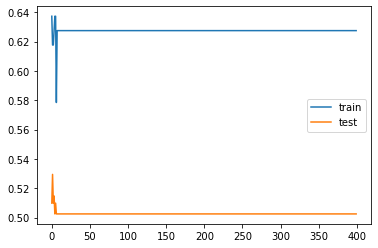

In [148]:
fit_model_optimizer(X_train, y_train, X_test, y_test,1)

Train: 0.637, Valid: 0.500


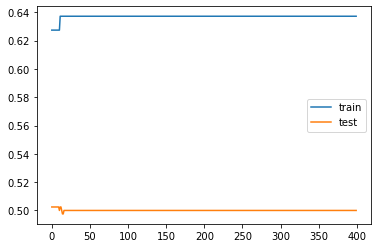

In [145]:
fit_model_optimizer(X_train, y_train, X_test, y_test,2)

Train: 0.627, Valid: 0.502


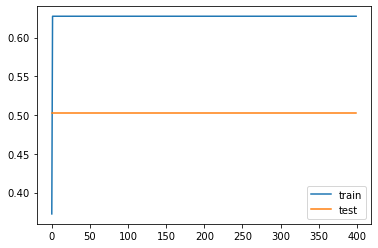

In [149]:
fit_model_optimizer(X_train, y_train, X_test, y_test,3)

Train: 0.637, Valid: 0.507


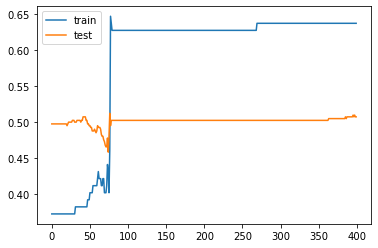

In [150]:
fit_model_optimizer(X_train, y_train, X_test, y_test,4)